# TME2: Prise en main de PIL et Matplotlib

> Consignes: le fichier **TME2_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en **TME2_nom1_nom2.ipynb**.
<tt>PIL</tt> (https://pillow.readthedocs.io/en/stable/index.html) est le module qui nous permet de lire, manipuler et écrire des images avec un grand nombre de formats possible. <tt>Matplotlib</tt> permet d'afficher des courbes et des images, il est chargé par l'intermédiaire du meta-module <tt>pylab</tt>. Les deux modules sont importés par la série d'instructions Python suivante:

In [1]:
from PIL import Image
from pylab import *


## Exercice 1 : chargement d'image et visualisation
### 1.1 Voir une image
Écrire un code Python qui charge l'image <tt>img/genies-math.jpg</tt> et l'affiche à l'aide de la commande imshow(). Afficher le mode de cette image.

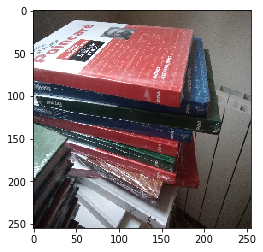

In [2]:
def lire_image(file):
    image = Image.open(file)
    imshow(image.resize((255,255)))

    
lire_image("./img/genies-math.jpg")

### 1.2 Conversion de mode
Convertir cette image en image à niveau de gris. Afficher simultanément les deux images couleurs et niveaux de gris,  l'une à droite, l'autre à gauche, sans les axes. Donner un titre à chaque image.

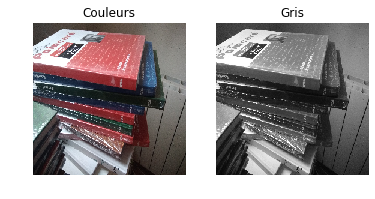

In [3]:
import matplotlib.pyplot  as plt

def gris(file): 
    image = Image.open(file)
    subplot(1,2,1)
    axis('off')
    plt.imshow(image)
    plt.title('Couleurs')

    
    
    imshow(image.resize((255,255)))
    
    
    i = Image.open(file).convert('L')
    subplot(1,2,2)
    axis('off')
    plt.imshow(i)
    plt.title('Gris')
    imshow(i.resize((255,255)))
    
    
gris("./img/genies-math.jpg")
    

### 1.3 Histogramme
Utiliser la méthode <tt>histogram()</tt> de la classe <tt>Image</tt> pour calculer l'histogramme de l'image en niveau de gris calculée à la question précédente. Afficher l'histogramme sous la forme d'un graphe de bar.

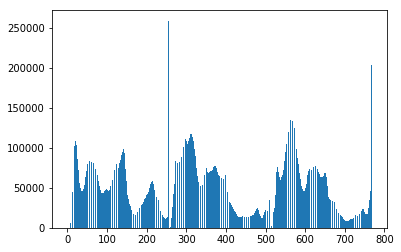

In [4]:
def histogramme(file) :
    image = Image.open(file)
    his = image.histogram ()
    bar(range(len(his)),his)
    show()
    
    
histogramme("./img/genies-math.jpg")
    

### 1.4 Égalisation d'histogramme
Utiliser les fonctions <tt>egalisation()</tt> et <tt>applique()</tt> du TME1 pour créer une liste de nouvelle valeurs dont l'histogramme a été égaliser. Puis en faire une nouvelle image PIL. Afficher l'image avant, puis après égalisation. Afficher l'histogramme de l'image égalisée.

table [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 15, 16, 18, 20, 21, 23, 25, 27, 28, 30, 32, 33, 35, 36, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 63, 65, 66, 68, 70, 72, 75, 77, 79, 81, 83, 86, 88, 90, 92, 95, 97, 99, 100, 102, 104, 106, 107, 109, 111, 112, 114, 115, 117, 118, 120, 121, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 159, 160, 161, 163, 164, 166, 167, 169, 170, 172, 173, 175, 176, 178, 180, 181, 183, 185, 186, 188, 190, 192, 193, 195, 197, 199, 200, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 214, 215, 216, 217, 217, 218, 219, 219, 220, 220, 221, 221, 222, 222, 223, 223, 223, 224, 224, 225, 225, 225, 226, 226, 226, 227, 227, 227, 228, 228, 228, 228, 229, 229, 229, 230, 230, 230, 231, 231, 231, 232, 232, 232, 233, 233, 233, 234, 234, 234, 234, 235, 235, 236, 236, 236, 237, 237, 237, 23

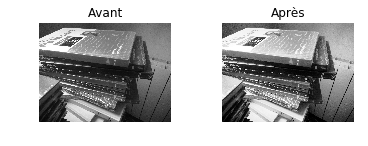

In [4]:
def egalisation(his):
    """ list[int] -> list[int] """
    #création de l'histogramme cumulé
    Hc = [0]*256
    Hc[0] = his[0]
    for i in range(1, 256):
        Hc[i] = Hc[i-1] + his[i]
        
    #égalisation
    table = [0]*256
    for i in range(256):
        table[i] = int((255/(Hc[255]))*Hc[i])
    print("table",table)
    return table

def applique_egal(data,table):
    """ list[int]*list[int] -> list[int] """
    #application de l'égalisation sur l'image.
    for i in range(len(data)):
        data[i] = table[data[i]]
    return data

def histogram(data,n):
    """ list[int]*int > list[int] """  
    #histogramme du nombre de pixel par valeur de niveau de gris.
    img = [0] * n
    for i in data:
        img[i] += 1
    return img

def egal(file):
    image = Image.open(file).convert('L')
            
    subplot(2,2,1)
    axis('off')
    plt.imshow(image)
    plt.title('Avant') 
     
    
    h = image.histogram()
    #Récupération des pixels de l'image 
    data = list(image.getdata())
    ap = applique_egal(data, egalisation(h))
    #on modifie les valeur des pixels de l'image et on applique ces changements sur l image.
    image.putdata(ap)
    
    
    subplot(2,2,2)
    axis('off')
    plt.imshow(image)
    plt.title('Après')

    
egal("./img/genies-math.jpg")
    

### 1.5 Egalisation d'histogramme (suite)
La classe <tt>ImageOps</tt> du module <tt>PIL</tt> contient une méthode <tt>equalize()</tt> qui égalise l'histogramme d'une image. Utiliser cette méthode et comparer le résultat avec votre propre fonction d'égalisation (comparer aussi les deux histogrammes après égalisation).

In [5]:
from PIL import ImageOps

image = Image.open("./img/genies-math.jpg").convert('L')

#Notre méthode
data = image.getdata()

h = image.histogram()
data = list(image.getdata())
ap = applique_egal(data, egalisation(h))
image.putdata(ap)

subplot(3,2,1)
axis('off')
plt.imshow(image)
plt.title('Notre méthode')

#Fonction equalize
eg = ImageOps.equalize(image)
subplot(3,2,2)
axis('off')
plt.imshow(eg)
plt.title('Autre  méthode')


print("Taille de l'image apres l'égalisation de notre méthode : ", len(ap))
print("Taille de l'image apres l'égaisation de leur méthode : ", len(list(eg.getdata())))
print("Les images sont elles identiques : ", ap==list(eg.getdata()))

#La taille des deux images égalisées est la même mais les images sont différentes.

NameError: name 'applique_egal' is not defined

## Exercice 2 : parcours d'image et calcul de statistiques
### 2.1 Calcul des extrema de l'image par parcours
Écrire une fonction <tt>extrema()</tt> qui prend une image PIL, la parcours pixel par pixel, à l'aide de classe <tt>PyAcess</tt> (ou une des autres méthodes vues en cours) et retourne ses valeurs minimale et maximale.


In [6]:
image = Image.open("./img/genies-math.jpg")

def extrema(image):
    data=list(image.getdata())
    mini=data[0]
    maxi=data[0]
    for i in range(len(data)) :
        if (data[i] < mini) :
            mini=data[i]
        if (data[i] > maxi) :
                maxi=data[i]
    return mini, maxi

            
print(extrema(image))

((0, 0, 4), (255, 255, 255))


### 2.2 Application et temps de calcul
Appliquer la fonction <tt>extrema()</tt> à l'image <tt>img/genies-math.jpg</tt>, convertie en niveau de gris. Comparer le temps d'exécution avec la méthode <tt>getextrema()</tt> de la classe Image. Pour comparer les temps d'exécution, on peut utiliser les deux fonctions <tt>tic()</tt> et <tt>tac()</tt>: la première démarre un chronomètre, la seconde affiche le temps écoulés depuis le dernier appel de l'un des deux fonctions. Quelle est la taille de cette image ? Comment expliquer ces différences de temps d'exécution ?

In [7]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

image = Image.open("./img/genies-math.jpg").convert('L') 
tic()
extrema(image)
tac()

tic()
image.getextrema()
tac()

4.655382000000003
0.0377420000000015


In [8]:
#L'autre méthode est beaucoup plus efficace.

## Exercice 3: sur la couleur
### 3.1 séparation de canaux
Écrire un code Python qui charge l'image <tt>mandrill.png</tt>. Vérifier, à l'aide d'un test de son mode est bien <tt>RGB</tt>.
Séparer les 3 canaux à l'aide de la méthode <tt>split()</tt> de la classe <tt>Image</tt>. On peut aussi, de façon alternative, utiliser la méthode <tt>getchannel()</tt>

In [9]:
mandrill = Image.open("./img/mandrill.png")

print("Le mode de l'image est " + mandrill.mode)

r, g, b = mandrill.split()


Le mode de l'image est RGB


### 3.2 échange de canaux
Créer une nouvelle image <tt>RGB</tt> dans laquelle on a échanger les canaux rouge et bleu. Afficher cette nouvelle image. On pourrat utilise la méthode <tt>merge()</tt> de la classe <tt>Image</tt>. Visualiser la nouvelle image. Essayer différente combinaison de canaux.

Text(0.5, 1.0, 'Echange canaux vert et rouge')

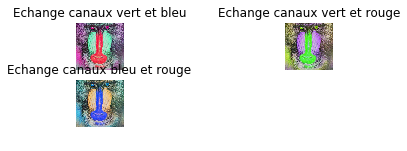

In [10]:
Echange_vb = Image.merge(mandrill.mode, (r,b,g))
subplot(4,2,1)
axis('off')
plt.imshow(Echange_vb)
plt.title('Echange canaux vert et bleu')


Echange_rb = Image.merge(mandrill.mode, (b,g,r))
subplot(4,2,3)
axis('off')
plt.imshow(Echange_rb)
plt.title('Echange canaux bleu et rouge')

Echange_vr = Image.merge(mandrill.mode, (g,r,b))
subplot(4,3,3)
axis('off')
plt.imshow(Echange_vr)
plt.title('Echange canaux vert et rouge')

### 3.3 Canaux séparés dans leur couleur
Écrire un code Python qui créée une image montrant le canal rouge en niveau de rouge. 
Faire de même pour les deux autres canaux.

Text(0.5, 1.0, 'Canal verte')

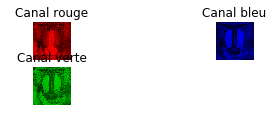

In [11]:
#on crée une nouvelle image avec une couleur ayant les mêmes valeurs que l'image passée en paramètre.
#et les valeurs des 2 autres couleurs sont mises à 0.
def montrerRouge(image) :
    r, g, b = image.split()
    imageRouge = Image.new("RGB", image.size)
    r2, g2, b2 = imageRouge.split()
    imageRouge = Image.merge('RGB', (r, g2, b2))
    return imageRouge

    
def montrerBleu(image) :
    r, g, b = image.split()
    imageBleue = Image.new("RGB", image.size)
    r2, g2, b2 = imageBleue.split()
    imageBleue = Image.merge('RGB', (r2, g2, b))
    return imageBleue
    
def montrerVerte(image) :
    r, g, b = image.split()
    imageVerte = Image.new("RGB", image.size)
    r2, g2, b2 = imageVerte.split()
    imageVerte = Image.merge('RGB', (r2, g, b2))
    return imageVerte
    
    
plt.subplot(5,2,1)
axis('off')
imshow(montrerRouge(mandrill))
plt.title('Canal rouge')

plt.subplot(5,2,2)
axis('off')
imshow(montrerBleu(mandrill))
plt.title('Canal bleu')

plt.subplot(5,2,3)
axis('off')
imshow(montrerVerte(mandrill))
plt.title('Canal verte')


## Exercice 4: avec image codée sur deux octets et ou virgule flottante
### 4.1 Image codée sur 2 octets
Charger l'image <tt>img/CT-scan.png</tt> et afficher les extremas de cette image. Cette image est issue d'une acquisition IRM, chaque valeur . Afficher l'image telle quelle et commenter. Quel opération faut-il faire pour voir tous les détails? Réaliser cette opération et afficher l'image transformée.

(0, 2244)


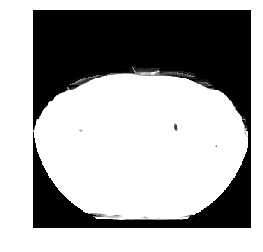

In [15]:
scan = Image.open("./img/CT-scan.png")
axis('off')
imshow(scan.resize((255,255)))
print(extrema(scan))



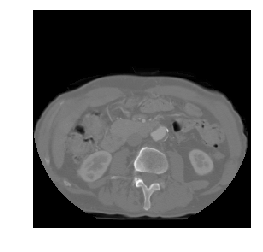

In [18]:
#L'image est trop étirée.

def etirement(image) :
    data = list(image.getdata())
    mini, maxi = extrema(image)
    for i in range(len(data)) :
        data[i] = (data[i] -mini) * 255.0 / (maxi-mini)
    return data

modif = etirement(scan)
scan.putdata(modif)
axis('off')
imshow(scan.resize((255,255)))


### 4.2 Image codée en virgule flottante

Même question avec l'image <tt>img/sst.tig</tt> qui est codée en virgule flottante et réprésente une image satellite de température de surface de l'Océan Atlantique. Afficher son mode.


(0.0, 27.25580596923828)
F


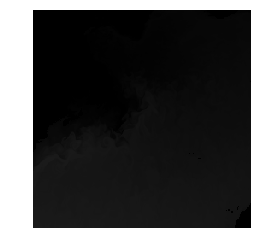

In [20]:
sst = Image.open("./img/sst.tif")
axis('off')
imshow(sst.resize((255,255)))
print(extrema(sst))
print(sst.mode)



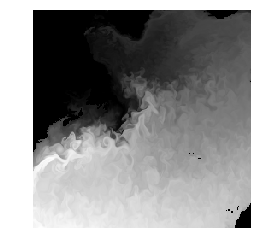

In [22]:
#Les valeurs sont trop concentrées.

modif = etirement(sst)
sst.putdata(modif)
axis('off')
imshow(sst.resize((255,255)))